In [ ]:
import pandas as pd

from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/john-zhang-uoft/hotel_price_prediction/main/data/images_with_prices_test.csv?token=GHSAT0AAAAAACALJUIBWIFVZZBQAHXGJUXWZA2G5MA'
df = pd.read_csv(url)

df.columns = ["Image", "Price"]
data_1 = list(df.itertuples(index=False, name=None))


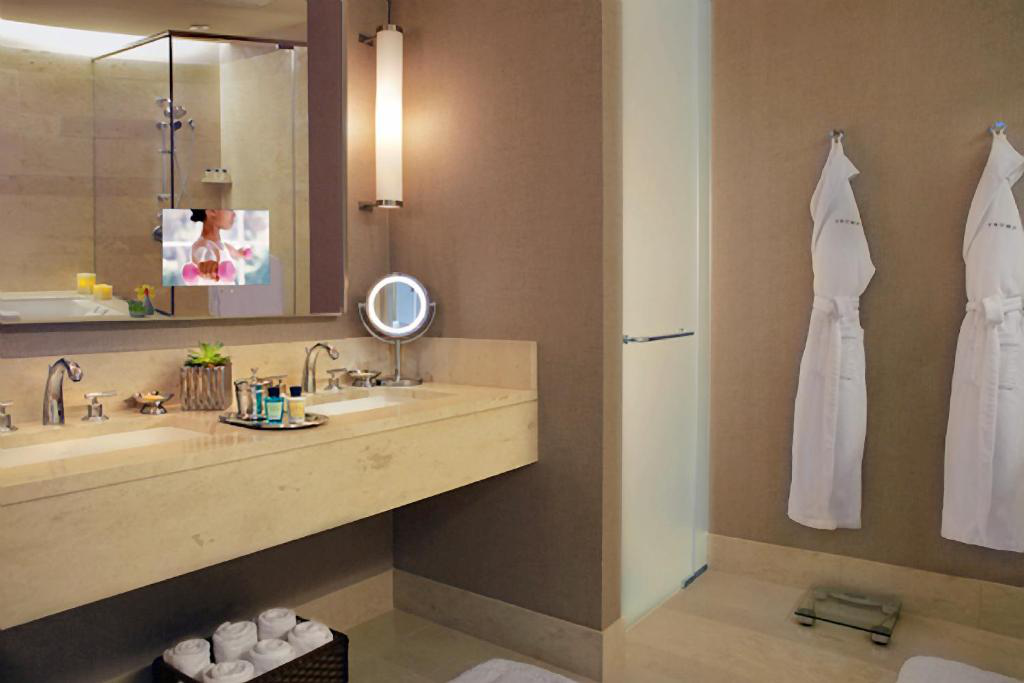

An exception occurred
An exception occurred
An exception occurred
An exception occurred


In [ ]:

row = data_1[0]
response = requests.get(row[0])
img = Image.open(BytesIO(response.content))

img.show()


data_2 = []
error_list = []

for row in data_1:
  try:
    response = requests.get(row[0])
    img = Image.open(BytesIO(response.content))
    data_2.append((img, row[1]))
  except:
    print("An exception occurred")
    error_list.append(img)
    
[(img1, price), (), ()]

#print(data_2)
#print(df["Image"])
#print(df["Price"])

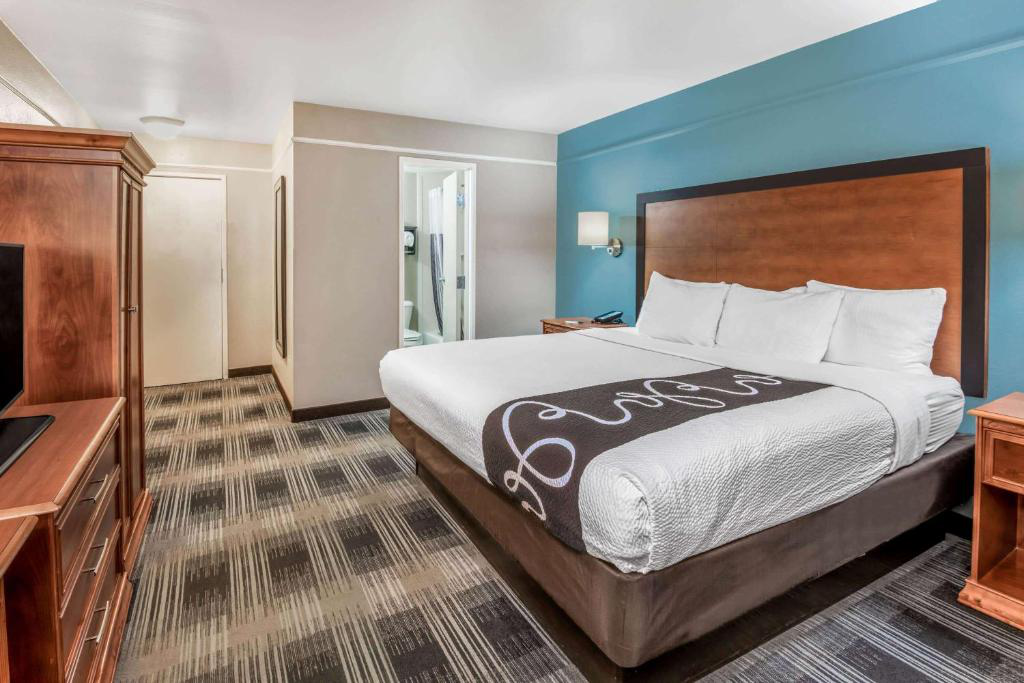

In [ ]:
error_list[1]

In [ ]:
!pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Epoch 50/10: 100%|██████████| 86/86 [00:11<00:00,  7.25it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

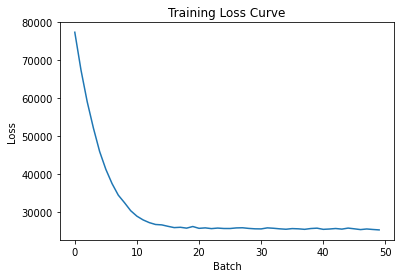

In [ ]:
# Import necessary libraries
import torch
from torchvision.models.swin_transformer import SwinTransformer

from torchvision.transforms import Resize, Compose
from PIL import Image

import csv
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import pandas as pd

# Load the pretrained SwinV2 transformer model
# used to be ([4, 4, 4, 4], 96, [2,2,6,2], [3,6,12,24] , [7, 7])
model = SwinTransformer([2, 2, 2, 2], 48, [1,1,3,1], [3,6,12,24] , [7, 7])  # Smaller Swin Transformer model


# Use the model for inference
input_tensor = torch.randn(1, 3, 224, 224)  # Create a random input tensor
output = model(input_tensor)  # Get the output from the model


# Modify the last layer of the model for regression
model.head = torch.nn.Linear(model.head.in_features, 1)

# Set the model to training mode
model.train()

# Define your loss function for regression, e.g., Mean Squared Error (MSE) loss
loss_function = torch.nn.MSELoss()

# Freeze all layers in the model
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final linear layer (model.head)
for param in model.head.parameters():
    param.requires_grad = True

# Create the optimizer with only the unfrozen parameters
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
    
# Create a custom dataset class
class CustomDataset(ImageFolder):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __getitem__(self, index):
        img, label = self.data[index]
        #print(img)
        if self.transform:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.data)

# Instantiate the custom dataset with the data and transformation
dataset = CustomDataset(data_2, transform=Compose([Resize((224, 224)), ToTensor()]))

# Create a DataLoader with the dataset
dataloader = DataLoader(dataset, batch_size=16, shuffle=True) # reduced from 32


import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
model = model.to(device)

# Initialize a list to store the loss values
loss_values = []

num_epochs = 50

# Fine-tune the model on your own regression problem
for epoch in range(num_epochs):  # Number of epochs

    # loss for each epoch
    epoch_loss = 0

    num_batches = 0

    # Wrap the dataloader loop with tqdm for a progress bar
    for batch in tqdm(dataloader, desc=f"Epoch {epoch + 1}/{10}"):
        num_batches += 1

        # Get input and target from the batch
        inputs, targets = batch

        # Move input and target tensors to the GPU
        inputs, targets = inputs.to(device), targets.to(device)

        # Convert targets to Float data type and add an extra dimension
        targets = targets.float().unsqueeze(1)

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = loss_function(outputs, targets)

        epoch_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update the model parameters
        optimizer.step()
    
    loss_values.append(epoch_loss/num_batches)

# Plot the training loss curve
plt.plot(loss_values)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show


In [ ]:
import math

print(math.sqrt(loss_values[-1]))

# 164.08

159.15671591540098


In [ ]:
print(model.head.in_features)

384
